<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Multiple%20Linear%20Regression/MLR_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Multiple Linear Regression for Gila River in USA Forecasting
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import pandas as pd
#con = pd.read_csv('Data/ConcreteStrength.csv')
#con

# Importing the datasets
import sklearn.datasets
df = pd.read_csv("https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Multiple%20Linear%20Regression/GilaRiverFlow.csv")

# Showing the shape of the data: rows and columns
[n, m] = df.shape
n, m


(365, 4)

In [8]:
X = df.iloc[:,0:m-1].values
y = df.iloc[:,m-1].values

In [11]:
df.describe()

,y(k-1),y(k-2),y(k-3),y(k)
count,365.000000,365.000000,365.000000,365.000000
mean,131.320548,130.931507,130.495890,131.684932
std,214.056103,214.165652,214.270082,213.945117
min,0.000000,0.000000,0.000000,24.000000
25%,42.000000,42.000000,41.000000,42.000000
50%,85.000000,85.000000,85.000000,86.000000
75%,134.000000,134.000000,134.000000,134.000000
max,2440.000000,2440.000000,2440.000000,2440.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y(k-1)  365 non-null    int64
 1   y(k-2)  365 non-null    int64
 2   y(k-3)  365 non-null    int64
 3   y(k)    365 non-null    int64
dtypes: int64(4)
memory usage: 11.5 KB


In [17]:
df.isnull().sum()

y(k-1)    0
y(k-2)    0
y(k-3)    0
y(k)      0
dtype: int64

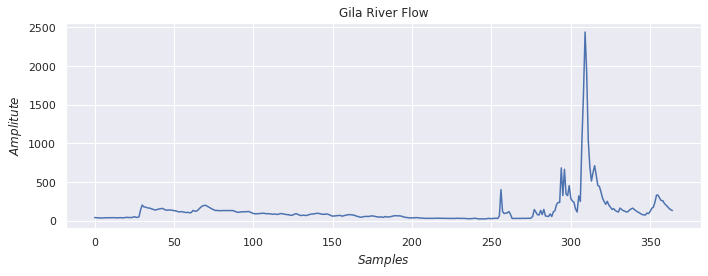

In [ ]:
# Drawing river flow

fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
plt.plot(y, '-b')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitute $', fontsize=12)
plt.title(r'Gila River Flow', fontsize=12)
plt.grid(True)
plt.show()


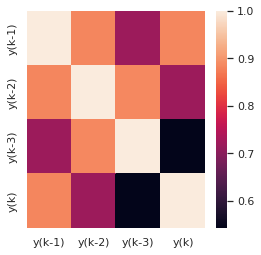

In [ ]:
# Correlation relation between delay of the data

sns.set(rc={"figure.figsize":(4, 4)}) 
sns.heatmap(df.corr())

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set result ￼
y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

In [ ]:
# Showing the model parameters which include the interecpt (a0) and the rest of model paremeters
lr.score(X_train, y_train)
print('Showing the developed LR model parameters')
print(f"a0={lr.intercept_} and a1={lr.coef_}")

Showing the developed LR model parameters
a0=11.4824281700337 and a1=[ 0.98161112  0.26990544 -0.33068789]


In [ ]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

vs1 = explained_variance_score(y_train, y_pred_train)
vs2 = explained_variance_score(y_test, y_pred_test)

print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Variance_score_train (VarScore):', format(vs1,".5f"), '    ', 'Variance_score_test (VarScore):', format(vs2,".5f"),)


mean_squared_error_train (MSE): 8249.45554      mean_squared_error_test (MSE): 17521.25379
mean_absolute_error_train (MAE): 29.90124      mean_absolute_error_test (MAE): 36.43618
Variance_score_train (VarScore): 0.84031      Variance_score_test (VarScore): 0.17895


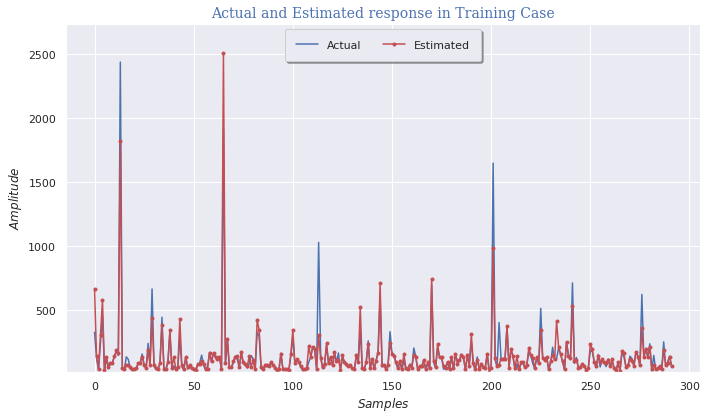

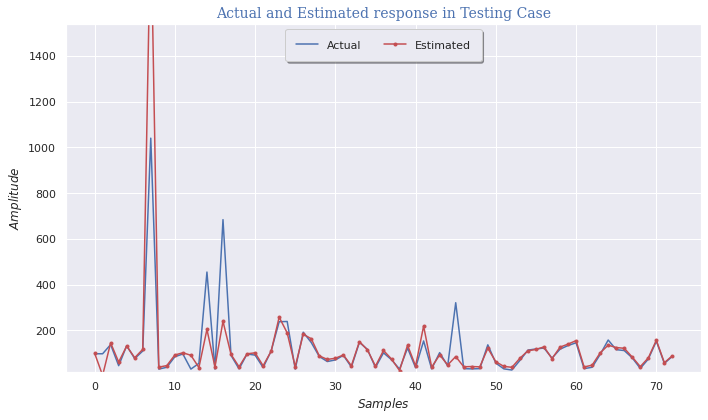

In [ ]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')

plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)

plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+300)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+500)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()

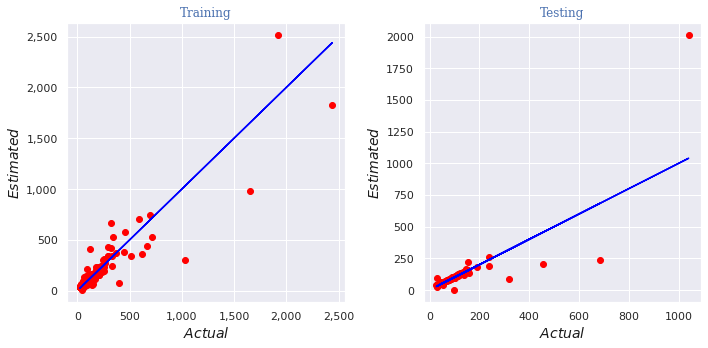

In [ ]:
# drawing Scatterplots
fig, axs = plt.subplots(figsize=(10, 5), tight_layout=True)

ax1 = plt.subplot(121)
ax1.plot(y_train, y_train, color = 'blue')
ax1.scatter(y_train, y_pred_train, color = 'red')
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Training', fontname= 'serif',fontsize=12, color='b')
ax1.grid(True)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#ax1.plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
#ax1.plt.show()

ax2 = plt.subplot(122)
#fig, axs = plt.subplots(figsize=(5, 5), tight_layout=True)
ax2.plot(y_test, y_test, color = 'blue')
ax2.scatter(y_test, y_pred_test, color = 'red')
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Testing', fontname= 'serif',fontsize=12, color='b')
ax1.grid(True)

#plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
#ax2.show()
